## Experimental demonstration of arbitrage versus real-world expectation

In [148]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import math

n = 100 #number of trials
x = np.zeros(n)
ps = np.random.randn(n)

S0 = 2  # initial stock price
B0 = 1  # initial bond price
u = 50  # uptick multiplier
d = 0.5 # downtick multiplier
K = 2   # strike
T = 1   # maturity
r = 0   # risk-free rate
p = 0.8 # real world probability of uptick

Su=u*S0 # uptick stock value
Sd=d*S0 #downtick stock payoff

Cu=max(Su-K,0.) # uptick call payoff
Cd=max(Sd-K,0.) #downtick call payoff

In [149]:
# run repeated experimental trials

rng = np.random.default_rng()
s = rng.binomial(1, p, n) # single sample, repeated n times: 1 for uptick, 0 for down

def callpayoff(uptick):
    if uptick==1: 
        payoff=Cu
    else:
        payoff=Cd
    return(payoff)

callpayoffv = np.vectorize(callpayoff) # vectorize
callpayoffs = callpayoffv(s)

print(callpayoffs)

callpvs = math.exp(-r*T)*callpayoffs # present values of individual payoffs

[98 98 98  0 98 98 98  0 98  0  0  0 98 98 98  0 98 98 98  0 98 98  0  0
 98 98  0 98 98 98  0  0 98  0 98 98  0 98 98 98 98  0  0  0 98 98 98 98
 98 98 98 98 98 98 98  0 98  0  0 98  0 98 98 98 98 98 98 98  0  0 98 98
 98 98 98 98 98 98 98  0 98 98 98 98 98  0  0 98 98 98 98 98  0  0 98 98
 98 98 98 98]


<IPython.core.display.Javascript object>


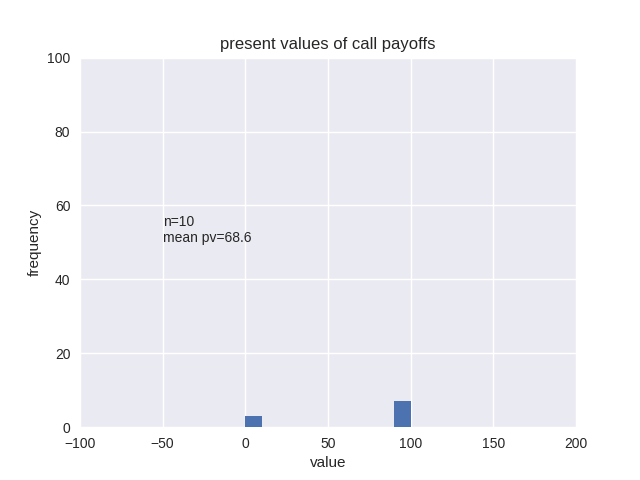

In [111]:

def updatecallpvs(curr):
    if curr == n:
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-100, 200, 10)
    plt.hist(callpvs[:curr], bins = bins)
    plt.axis([-100, 200, 0, 100])
    plt.gca().set_title('present values of call payoffs')
    plt.gca().set_ylabel('frequency')
    plt.gca().set_xlabel('value')
    plt.gca().annotate('n={}\nmean pv={}'.format(curr,np.mean(callpvs[:curr+1])), [-50, 50])


fig = plt.figure()
a = animation.FuncAnimation(fig, updatecallpvs, interval = 100)

plt.show()

In [150]:
callvalue=float(input('Enter market price of call ')) # guess something for experiment
print(callvalue)

Enter market price of call 70
70.0


In [151]:
#set up hedge
phi1=(Cu-Cd)/(Su-Sd)
psi1=math.exp(-r*T)*(Cu-phi1*Su)/B0
hedgecost=phi1*S0+psi1*B0
print('hedgecost',hedgecost)

initialnetcash=callvalue-hedgecost
print('initial net cash',initialnetcash)

def hedgepayoff(uptick):
    if uptick==1: 
        payoff=phi1*Su+psi1*math.exp(r*T)*B0
    else:
        payoff=phi1*Sd+psi1*math.exp(r*T)*B0
    return(payoff)

hedgepayoffv = np.vectorize(hedgepayoff) # vectorize
hedgepayoffs = hedgepayoffv(s)
hedgepvs=math.exp(-r*T)*hedgepayoffs


payoffpvs=hedgepvs-callpvs

netpvs=initialnetcash+payoffpvs

hedgecost 0.9898989898989903
initial net cash 69.01010101010101


<IPython.core.display.Javascript object>


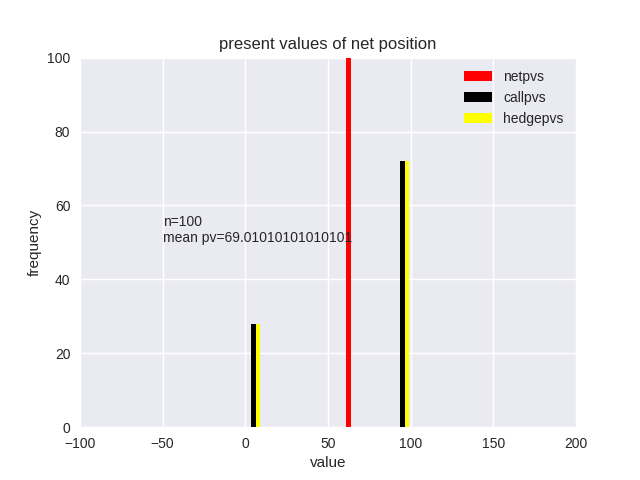

In [165]:
def updatenetpvs(curr):
    if curr == n:
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-100, 200, 10)
    #plt.hist(netpvs[:curr], alpha=0.5,bins = bins,label='netpvs')
    #plt.hist(callpvs[:curr], alpha=0.5,bins = bins,label='callpvs')
    #plt.hist(hedgepvs[:curr], alpha=0.5,bins = bins,label='hedgepvs')
    plt.hist(np.dstack((netpvs[:curr],callpvs[:curr],hedgepvs[:curr]))[0], bins = bins, color = ['red', 'black', 'yellow'],label=['netpvs','callpvs','hedgepvs'])
    plt.axis([-100, 200, 0, 100])
    plt.gca().set_title('present values of net position')
    plt.gca().set_ylabel('frequency')
    plt.gca().set_xlabel('value')
    plt.gca().annotate('n={}\nmean pv={}'.format(curr,np.mean(netpvs[:curr+1])), [-50, 50])
    plt.legend()
    

fig = plt.figure()
a = animation.FuncAnimation(fig, updatenetpvs, interval = 500)

plt.show()
